# <div align='center'>Exploratory Data Analysis of Mall Customers Data</div>

Loading necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_mall_customers.csv")
df.shape

(200, 5)

In [18]:
df

,id,gender,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#### Descriptive statistics

In [3]:
df.describe()

,id,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


#### Correlation between features

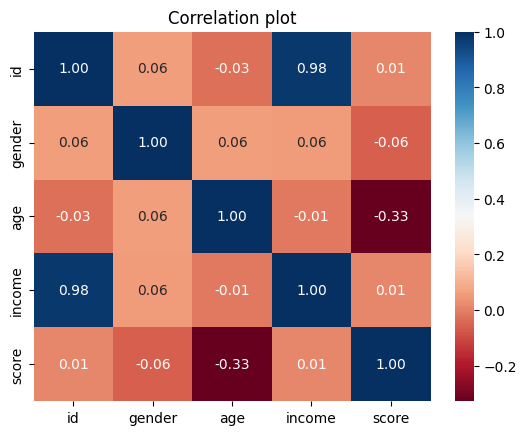

In [5]:
correlation = df.corr()
sns.heatmap(correlation, cmap='RdBu', annot=True, fmt='.2f')
plt.title("Correlation plot")
plt.show()

#### Understanding Data Distribution

**Income of the customers**

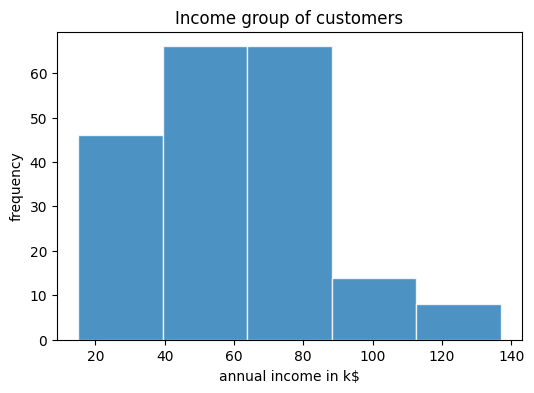

In [42]:
plt.figure(figsize=(6,4))
x = df['income']
plt.hist(x, bins=5, edgecolor= 'white', alpha=0.8)
plt.title("Income group of customers")
plt.xlabel('annual income in k$')
plt.ylabel('frequency')
plt.show()

**Age Distribution**

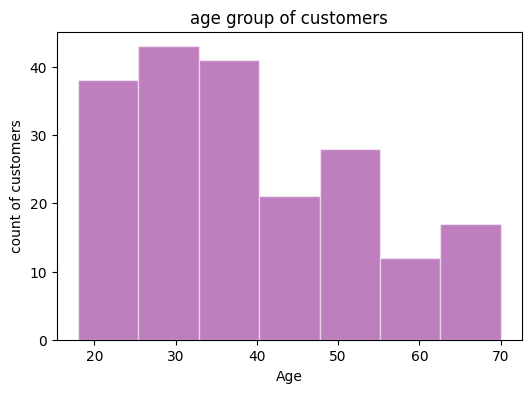

In [41]:
plt.figure(figsize=(6,4))
x = df['age']
plt.hist(x, bins=7, edgecolor= 'white',color= 'purple', alpha=0.5)
plt.title("age group of customers")
plt.xlabel('Age')
plt.ylabel('count of customers')
plt.show()

**Spending score distribution**

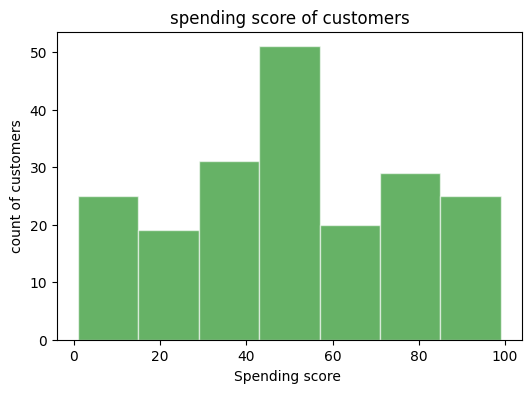

In [15]:
plt.figure(figsize=(6,4))
x = df['score']
plt.hist(x, bins=7, edgecolor= 'white',color= 'green', alpha=0.6)
plt.title("spending score of customers")
plt.xlabel('Spending score ')
plt.ylabel('count of customers')
plt.show()

**Annual income vs Spending score**

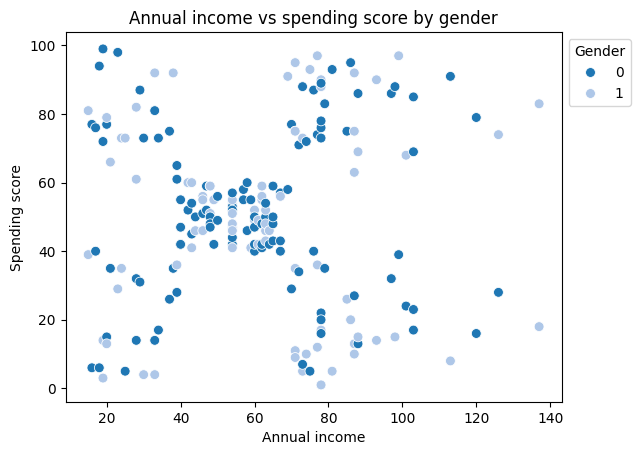

In [35]:
sns.scatterplot(x='income',y='score', hue='gender', data=df, s=50, palette='tab20')
plt.title("Annual income vs spending score by gender")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Gender')
plt.show()

**Probability of income and spending score**

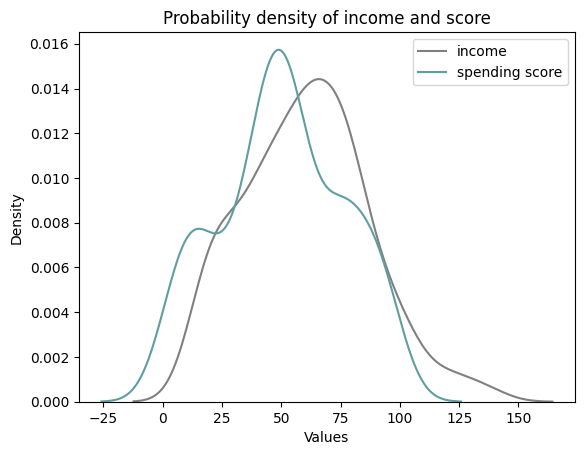

In [43]:
sns.distplot(df['income'], color='grey',hist=False, label='income')
sns.distplot(df['score'], color='cadetblue',hist=False, label='spending score')
plt.title("Probability density of income and score")
plt.xlabel('Values')
plt.legend()
plt.show()

#### Data Analysis

**Which gender spends more?**

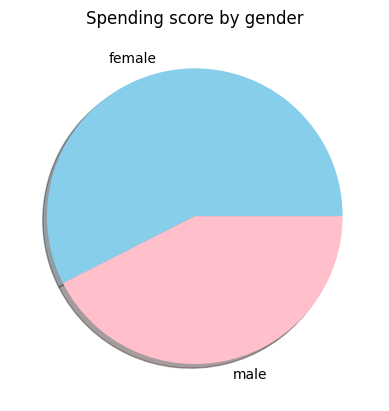

In [44]:
score_by_gender = df.groupby('gender')['score'].sum().reset_index()
plt.pie(score_by_gender['score'], colors=['skyblue','pink'],shadow=True, labels=['female','male'])
plt.title("Spending score by gender")
plt.show()

**Which age group spends more?**

In [46]:
score_by_age = df.groupby(['age','gender'])['score'].sum().reset_index()
score_pivot = score_by_age.pivot(columns='gender', index='age').fillna(0)
# score_pivot

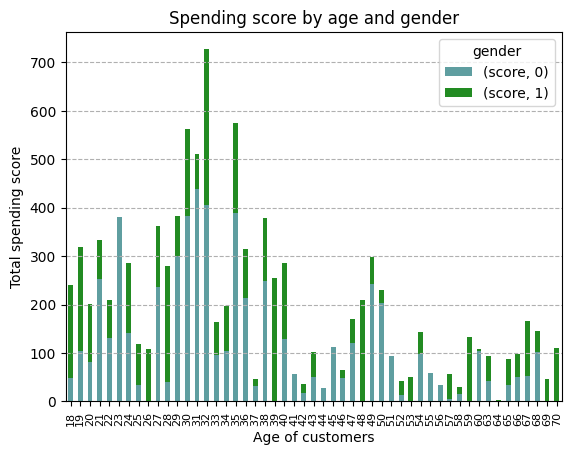

In [47]:
score_pivot.plot(kind='bar', stacked=True, color=['cadetblue','forestgreen'])
plt.title("Spending score by age and gender")
plt.xlabel("Age of customers")
plt.ylabel("Total spending score")
plt.legend(title='gender')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90, fontsize= 8)
plt.show()